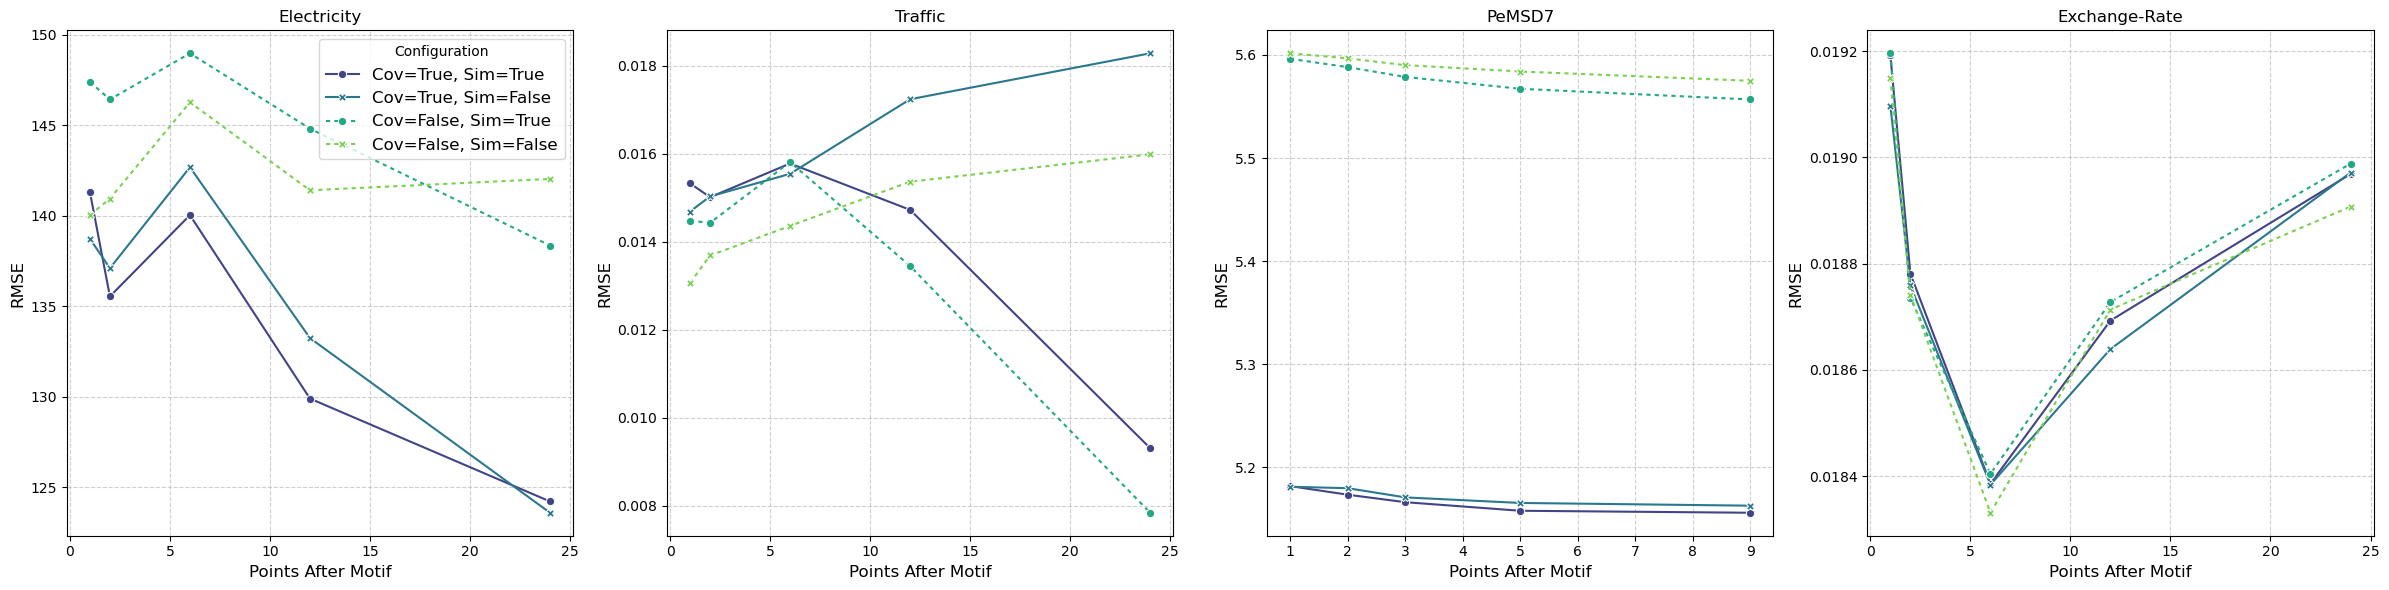

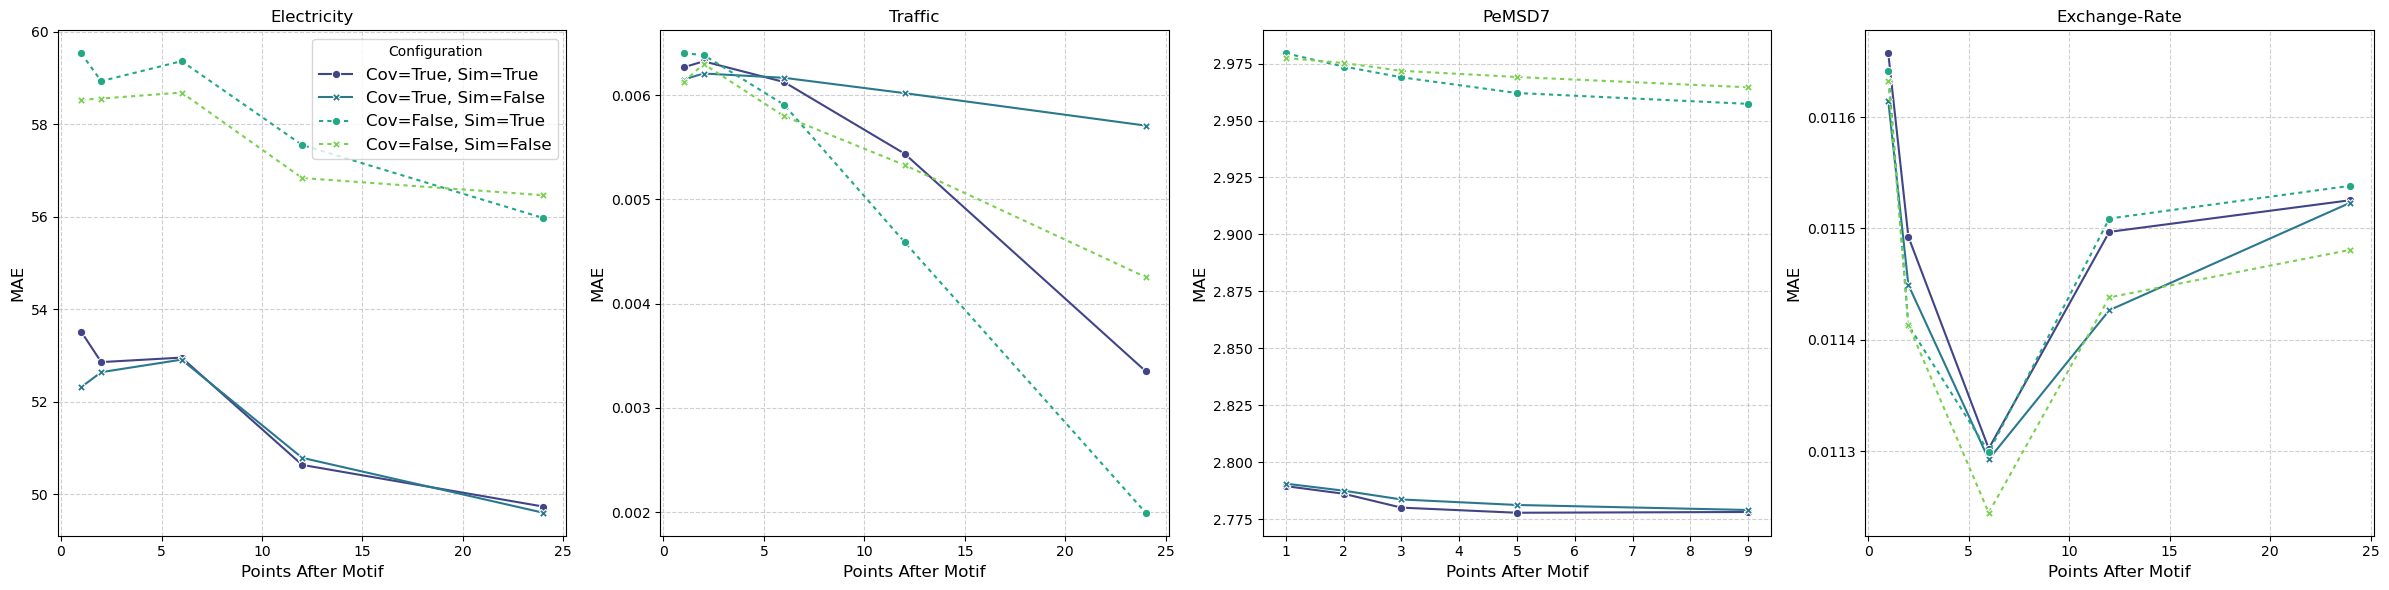

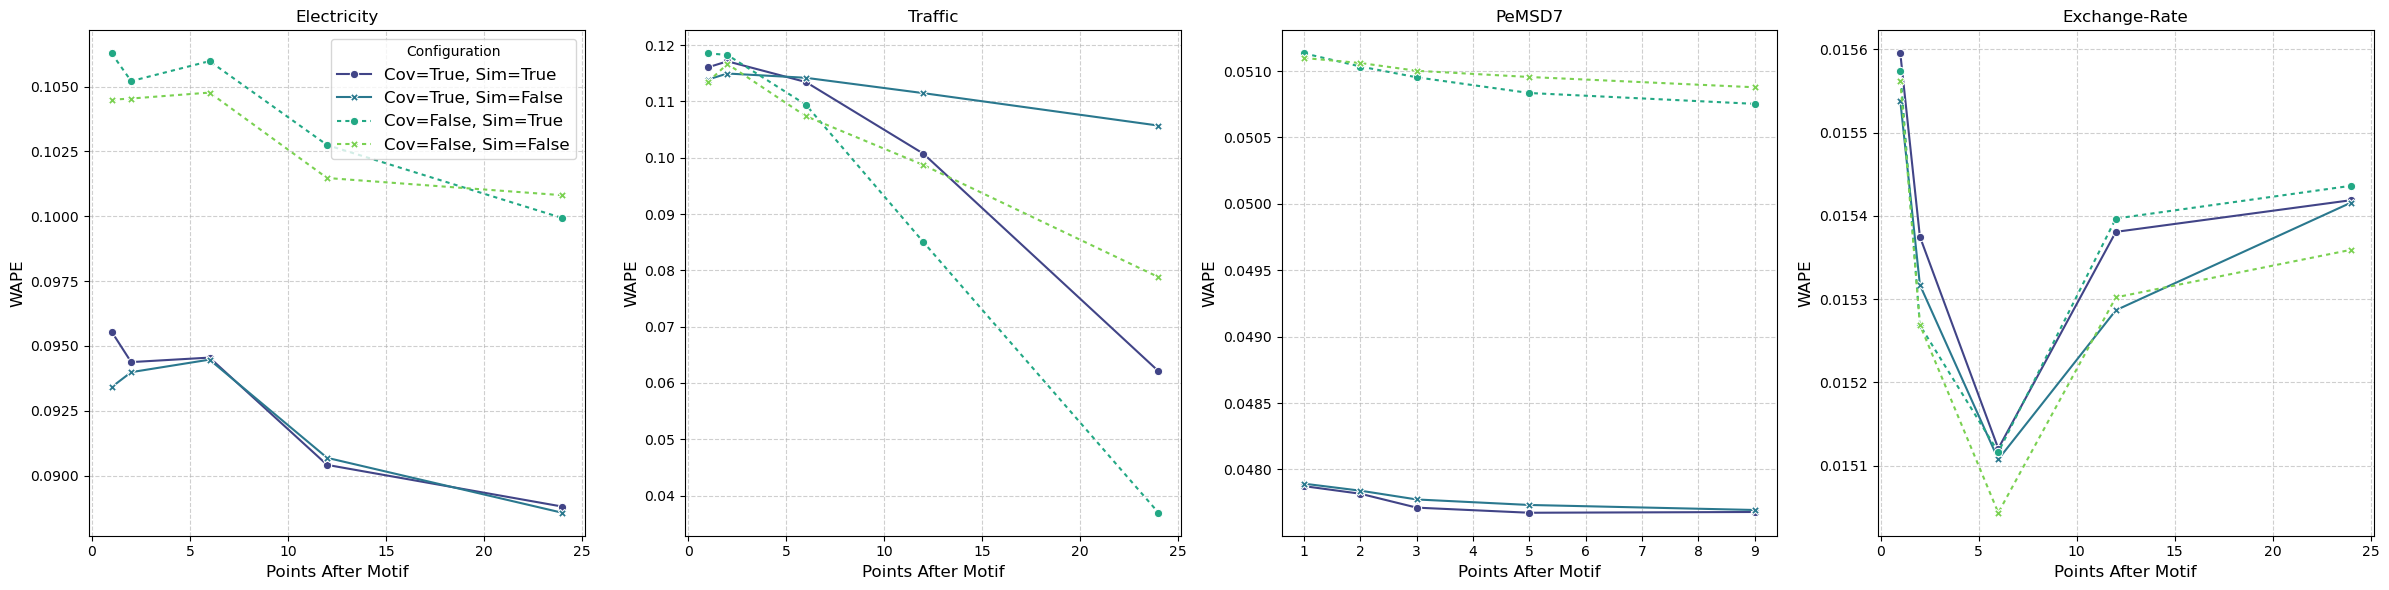

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

files = {
    'Electricity': '../results/local_daikon/grid_search_electricity_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv',
    'Traffic': '../results/local_daikon/grid_search_traffic_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv',
    'PeMSD7': '../results/local_daikon/grid_search_pems_results_[True, False]_True_[1]_[1]_[1, 2, 3, 5, 9]_[True, False]_[True, False].csv',
    'Exchange-Rate': '../results/local_daikon/grid_search_exchange_rate_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv'
}

dfs = []
for ds_name, fname in files.items():
    if os.path.exists(fname):
        df = pd.read_csv(fname)
        df['dataset'] = ds_name
        # Filter: Unnormalized data only
        df = df[df['do_normalization'] == False]
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Create Descriptive Labels
combined_df['Config'] = combined_df.apply(
    lambda x: f"Cov={'True' if x['include_covariates'] else 'False'}, Sim={'True' if x['include_similarity'] else 'False'}", 
    axis=1
)

# Plotting
datasets = combined_df['dataset'].unique()

unique_configs = combined_df['Config'].unique()
dashes_map = {}
markers_map = {}

for conf in unique_configs:
    if "Cov=False" in conf:
        dashes_map[conf] = (2, 2)
    else:
        dashes_map[conf] = ""
        
    if "Sim=True" in conf:
        markers_map[conf] = "o"
    else:
        markers_map[conf] = "X"

metrics = ['RMSE', 'MAE', 'WAPE']

for metric in metrics:
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    axes = axes.flatten()
    
    for i, ds in enumerate(datasets):
        ax = axes[i]
        subset = combined_df[combined_df['dataset'] == ds]
        
        sns.lineplot(
            data=subset, 
            x='no_points_after_motif', 
            y=metric, 
            hue='Config', 
            style='Config', 
            markers=markers_map,
            dashes=dashes_map,
            ax=ax,
            palette='viridis'
        )
        
        ax.set_title(f"{ds}")
        ax.set_xlabel("Points After Motif", fontsize='large')
        ax.set_ylabel(metric, fontsize='large')
        ax.grid(True, linestyle='--', alpha=0.6)
        if i == 0: # Only show legend on first plot to save space, or handle separately
            ax.legend(title='Configuration', fontsize='large', loc='upper right')
        else:
            if ax.get_legend():
                ax.get_legend().remove()

    plt.tight_layout()
    if metric == 'RMSE':
        plt.savefig(f'../figures/points_trend_analysis_{metric}.pdf')
    plt.show()

In [2]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")

This notebook was last run end-to-end on: 2026-01-24 16:19:53.112344

